In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['figure.figsize'] = (10,5)
plt.rcParams['figure.dpi'] = (200)
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler,LabelEncoder,OrdinalEncoder
from sklearn.metrics import classification_report
import tensorflow as ts
from tensorflow.keras.layers import Dense
from tensorflow.keras import Sequential
import warnings 
warnings.filterwarnings('ignore')
%matplotlib inline

In [3]:
df=pd.read_csv('C:\\Users\\Abhishek\\Downloads\\forestfires.csv',encoding='latin1')
df

,month,day,FFMC,DMC,DC,ISI,temp,RH,wind,rain,...,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep,size_category
0,mar,fri,86.2,26.2,94.3,5.1,8.2,51,6.7,0.0,...,0,0,0,0,1,0,0,0,0,small
1,oct,tue,90.6,35.4,669.1,6.7,18.0,33,0.9,0.0,...,0,0,0,0,0,0,0,1,0,small
2,oct,sat,90.6,43.7,686.9,6.7,14.6,33,1.3,0.0,...,0,0,0,0,0,0,0,1,0,small
3,mar,fri,91.7,33.3,77.5,9.0,8.3,97,4.0,0.2,...,0,0,0,0,1,0,0,0,0,small
4,mar,sun,89.3,51.3,102.2,9.6,11.4,99,1.8,0.0,...,0,0,0,0,1,0,0,0,0,small
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
512,aug,sun,81.6,56.7,665.6,1.9,27.8,32,2.7,0.0,...,0,0,0,0,0,0,0,0,0,large
513,aug,sun,81.6,56.7,665.6,1.9,21.9,71,5.8,0.0,...,0,0,0,0,0,0,0,0,0,large
514,aug,sun,81.6,56.7,665.6,1.9,21.2,70,6.7,0.0,...,0,0,0,0,0,0,0,0,0,large
515,aug,sat,94.4,146.0,614.7,11.3,25.6,42,4.0,0.0,...,0,0,0,0,0,0,0,0,0,small


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 517 entries, 0 to 516
Data columns (total 31 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   month          517 non-null    object 
 1   day            517 non-null    object 
 2   FFMC           517 non-null    float64
 3   DMC            517 non-null    float64
 4   DC             517 non-null    float64
 5   ISI            517 non-null    float64
 6   temp           517 non-null    float64
 7   RH             517 non-null    int64  
 8   wind           517 non-null    float64
 9   rain           517 non-null    float64
 10  area           517 non-null    float64
 11  dayfri         517 non-null    int64  
 12  daymon         517 non-null    int64  
 13  daysat         517 non-null    int64  
 14  daysun         517 non-null    int64  
 15  daythu         517 non-null    int64  
 16  daytue         517 non-null    int64  
 17  daywed         517 non-null    int64  
 18  monthapr  

In [5]:
df.describe()

,FFMC,DMC,DC,ISI,temp,RH,wind,rain,area,dayfri,...,monthdec,monthfeb,monthjan,monthjul,monthjun,monthmar,monthmay,monthnov,monthoct,monthsep
count,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,...,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000,517.000000
mean,90.644681,110.872340,547.940039,9.021663,18.889168,44.288201,4.017602,0.021663,12.847292,0.164410,...,0.017408,0.038685,0.003868,0.061896,0.032882,0.104449,0.003868,0.001934,0.029014,0.332689
std,5.520111,64.046482,248.066192,4.559477,5.806625,16.317469,1.791653,0.295959,63.655818,0.371006,...,0.130913,0.193029,0.062137,0.241199,0.178500,0.306138,0.062137,0.043980,0.168007,0.471632
min,18.700000,1.100000,7.900000,0.000000,2.200000,15.000000,0.400000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,90.200000,68.600000,437.700000,6.500000,15.500000,33.000000,2.700000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,91.600000,108.300000,664.200000,8.400000,19.300000,42.000000,4.000000,0.000000,0.520000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,92.900000,142.400000,713.900000,10.800000,22.800000,53.000000,4.900000,0.000000,6.570000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,96.200000,291.300000,860.600000,56.100000,33.300000,100.000000,9.400000,6.400000,1090.840000,1.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
df.drop(columns=['month','day'],inplace=True)

In [10]:
df['size_category'].unique()

array(['small', 'large'], dtype=object)

In [15]:
le = LabelEncoder()


In [16]:
df['size_category'] = le.fit_transform(df['size_category'])


In [17]:
x = df.iloc[:,:-1]
y = df['size_category']

In [18]:
y


0      1
1      1
2      1
3      1
4      1
      ..
512    0
513    0
514    0
515    1
516    1
Name: size_category, Length: 517, dtype: int32

In [19]:
sc = StandardScaler()
x = sc.fit_transform(x)
x

array([[-8.05959472e-01, -1.32332557e+00, -1.83047676e+00, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [-8.10203395e-03, -1.17954077e+00,  4.88890915e-01, ...,
        -4.40225453e-02,  5.78503817e+00, -7.06081245e-01],
       [-8.10203395e-03, -1.04982188e+00,  5.60715454e-01, ...,
        -4.40225453e-02,  5.78503817e+00, -7.06081245e-01],
       ...,
       [-1.64008316e+00, -8.46647711e-01,  4.74768113e-01, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [ 6.80956663e-01,  5.49002541e-01,  2.69382214e-01, ...,
        -4.40225453e-02, -1.72859706e-01, -7.06081245e-01],
       [-2.02087875e+00, -1.68591332e+00, -1.78044169e+00, ...,
         2.27156334e+01, -1.72859706e-01, -7.06081245e-01]])

In [20]:
xtrain,xtest,ytrain,ytest = train_test_split(x,y,test_size=0.2,random_state=1)


In [21]:
# initialize the model
ann = Sequential()

# Add hidden layers 
ann.add(Dense(units=6,activation='relu'))

# Add output layer
ann.add(Dense(units=1,activation='sigmoid'))

# Establishing the relatationship betweem Layer
ann.compile(optimizer='adam',loss='binary_crossentropy')

ann.fit(xtrain,ytrain,epochs=50)

Epoch 1/50
13/13 [==============================] - 4s 12ms/step - loss: 0.6593
Epoch 2/50
13/13 [==============================] - 0s 4ms/step - loss: 0.6442
Epoch 3/50
13/13 [==============================] - 0s 4ms/step - loss: 0.6308
Epoch 4/50
13/13 [==============================] - 0s 4ms/step - loss: 0.6186
Epoch 5/50
13/13 [==============================] - 0s 4ms/step - loss: 0.6074
Epoch 6/50
13/13 [==============================] - 0s 4ms/step - loss: 0.5975
Epoch 7/50
13/13 [==============================] - 0s 4ms/step - loss: 0.5881
Epoch 8/50
13/13 [==============================] - 0s 4ms/step - loss: 0.5793
Epoch 9/50
13/13 [==============================] - 0s 4ms/step - loss: 0.5722
Epoch 10/50
13/13 [==============================] - 0s 3ms/step - loss: 0.5650
Epoch 11/50
13/13 [==============================] - 0s 5ms/step - loss: 0.5585
Epoch 12/50
13/13 [==============================] - 0s 3ms/step - loss: 0.5526
Epoch 13/50
13/13 [=============================

In [22]:
yp = ann.predict(xtest)
yp = yp > 0.5
yp


4/4 [==============================] - 0s 2ms/step


array([[ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [False],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [ True],
       [

In [23]:
print(classification_report(ytest,yp))


              precision    recall  f1-score   support

           0       0.67      0.21      0.32        29
           1       0.76      0.96      0.85        75

    accuracy                           0.75       104
   macro avg       0.71      0.58      0.58       104
weighted avg       0.73      0.75      0.70       104



In [24]:
ann = Sequential()

ann.add(Dense(units=30,activation='relu'))
ann.add(Dense(units=25,activation='relu'))

ann.add(Dense(units=1,activation='tanh'))

ann.compile(optimizer='adam',loss='binary_crossentropy')

ann.fit(xtrain,ytrain,validation_data=(xtest,ytest),epochs=70)

Epoch 1/70
13/13 [==============================] - 2s 40ms/step - loss: 9.8096 - val_loss: 9.2201
Epoch 2/70
13/13 [==============================] - 0s 7ms/step - loss: 8.3955 - val_loss: 7.6357
Epoch 3/70
13/13 [==============================] - 0s 7ms/step - loss: 7.2257 - val_loss: 6.4521
Epoch 4/70
13/13 [==============================] - 0s 6ms/step - loss: 5.6790 - val_loss: 4.4341
Epoch 5/70
13/13 [==============================] - 0s 7ms/step - loss: 4.2017 - val_loss: 2.8435
Epoch 6/70
13/13 [==============================] - 0s 7ms/step - loss: 2.7742 - val_loss: 1.9931
Epoch 7/70
13/13 [==============================] - 0s 7ms/step - loss: 1.9016 - val_loss: 1.3721
Epoch 8/70
13/13 [==============================] - 0s 7ms/step - loss: 1.3144 - val_loss: 1.0796
Epoch 9/70
13/13 [==============================] - 0s 7ms/step - loss: 1.0975 - val_loss: 1.0072
Epoch 10/70
13/13 [==============================] - 0s 9ms/step - loss: 0.9624 - val_loss: 0.9791
Epoch 11/70
13/13 

<Axes: >

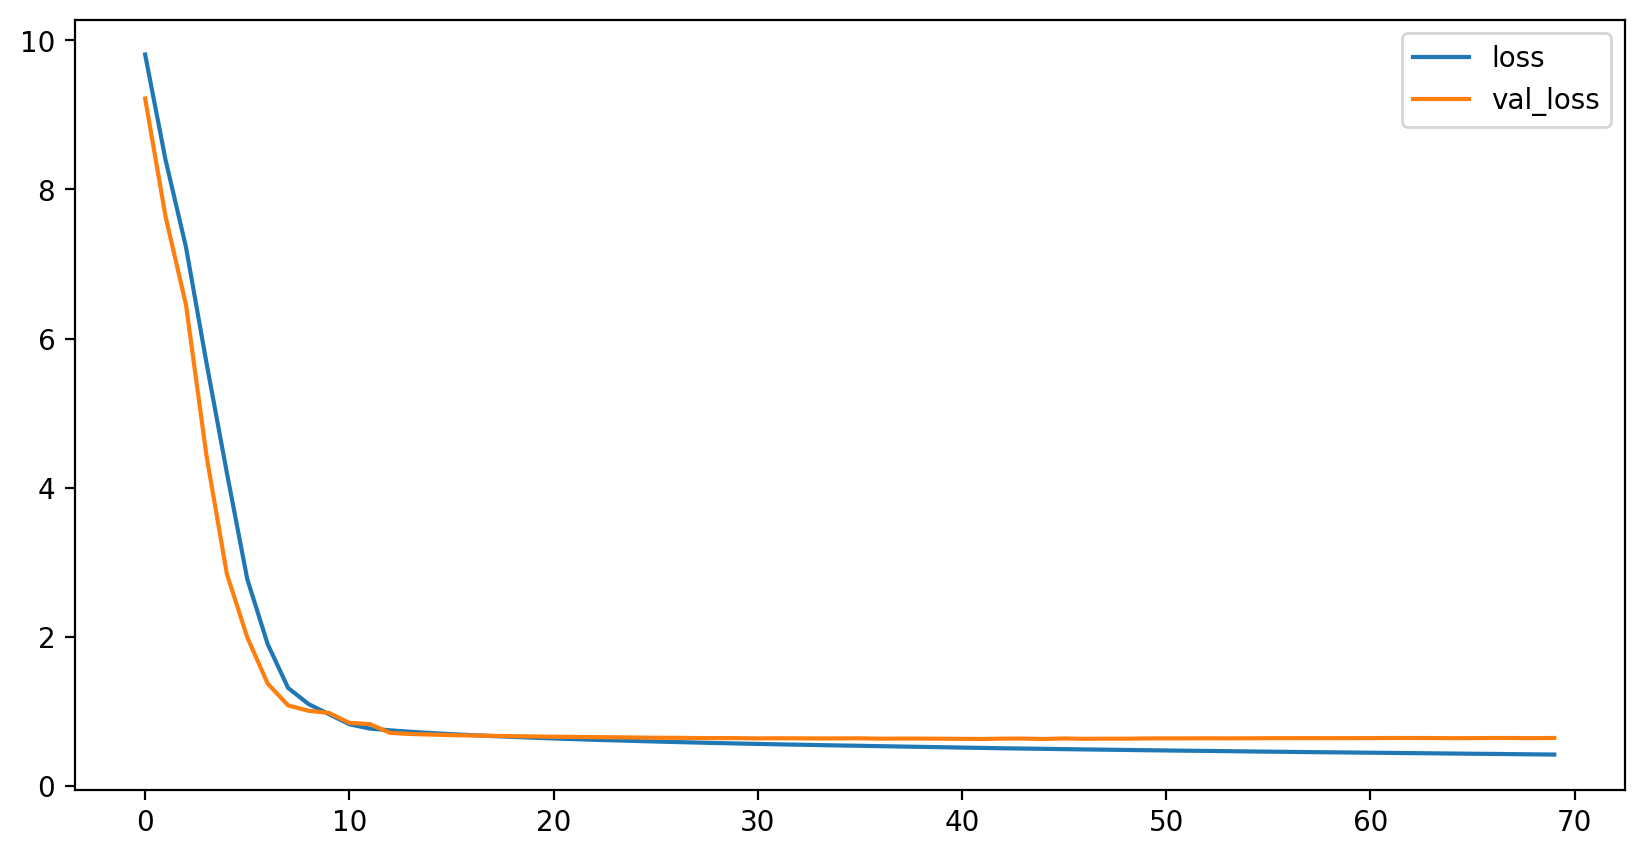

In [25]:
val_loss = pd.DataFrame(ann.history.history)
val_loss.plot()